# Generowanie danych


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random


np.random.seed(42)

# Parametry danych, 50 klientow i 20 produktów (unikalnych)

liczba_transakcji = 500
klienci = [f'Klient_{i}' for i in range(1, 51)]  
produkty = [f'Produkt_{i}' for i in range(1, 21)]  
lokalizacje = ['Warszawa', 'Kraków', 'Poznań', 'Wrocław', 'Gdańsk']

# Losowa data (ostatnie 6 miesięcy - 180dni)
def losowa_data():
    base_date = datetime.today()
    delta = timedelta(days=random.randint(0, 180))
    return base_date - delta

# Generujowanie danych: każda transakcja może mieć od 1 do 3 produktów
dane = []
for i in range(1, liczba_transakcji + 1):
    klient = random.choice(klienci)
    data = losowa_data().strftime('%Y-%m-%d')
    lokalizacja = random.choice(lokalizacje)
    liczba_produktow = random.randint(1, 3)
    transakcja_produkty = random.sample(produkty, liczba_produktow)
    for prod in transakcja_produkty:
        dane.append({
            'TransakcjaID': i,
            'Klient': klient,
            'Produkt': prod,
            'Data': data,
            'Lokalizacja': lokalizacja
        })

df = pd.DataFrame(dane)
print(df.head())

df.to_csv('sales_data.csv', index=False, encoding='utf-8')


   TransakcjaID     Klient     Produkt        Data Lokalizacja
0             1  Klient_21   Produkt_8  2024-11-03      Gdańsk
1             2  Klient_11  Produkt_11  2024-11-25      Gdańsk
2             2  Klient_11   Produkt_1  2024-11-25      Gdańsk
3             3  Klient_16  Produkt_20  2024-12-14      Poznań
4             3  Klient_16  Produkt_19  2024-12-14      Poznań


# Wczytanie Danych

In [21]:

df = pd.read_excel('sales_data.xlsx')
#zmiana daty na typ Date
df['Data'] = pd.to_datetime(df['Data'])
print(df.info())
print(df.describe(include='object'))
print("Liczba unikalnych klientów:", df['Klient'].nunique())
print("Najpopularniejsze produkty:\n", df['Produkt'].value_counts())

# Agregacja: liczba transakcji na klienta
transakcje_klient = df.groupby('Klient')['TransakcjaID'].nunique().reset_index()
transakcje_klient.columns = ['Klient', 'LiczbaTransakcji']
print(transakcje_klient.sort_values(by='LiczbaTransakcji', ascending=False).head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TransakcjaID  1006 non-null   int64         
 1   Klient        1006 non-null   object        
 2   Produkt       1006 non-null   object        
 3   Data          1006 non-null   datetime64[ns]
 4   Lokalizacja   1006 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 39.4+ KB
None
          Klient    Produkt Lokalizacja
count       1006       1006        1006
unique        50         20           5
top     Klient_3  Produkt_1    Warszawa
freq          33         62         232
Liczba unikalnych klientów: 50
Najpopularniejsze produkty:
 Produkt
Produkt_1     62
Produkt_15    58
Produkt_20    58
Produkt_13    56
Produkt_9     56
Produkt_17    56
Produkt_3     56
Produkt_2     54
Produkt_18    53
Produkt_7     51
Produkt_16    49
Produkt_19    

# Tworzenie wykresów - wizualizacja danych

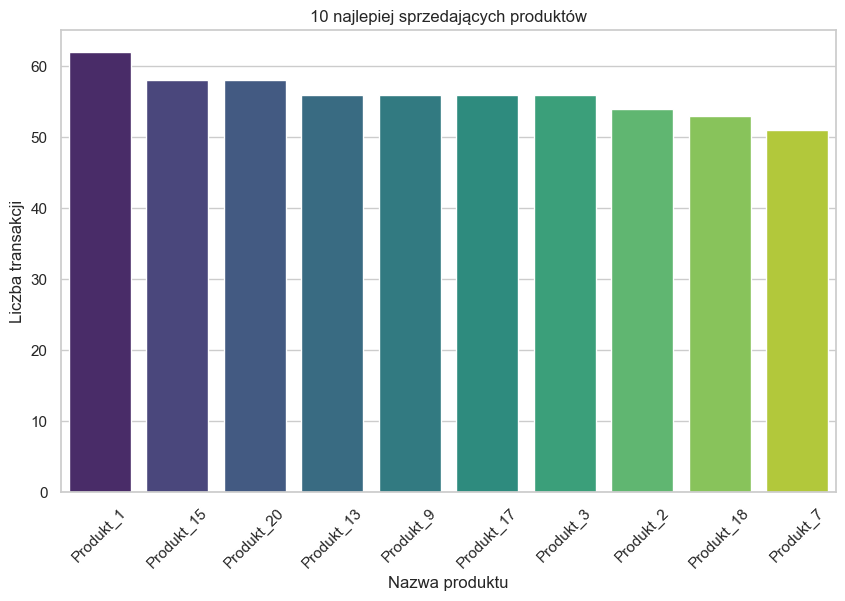

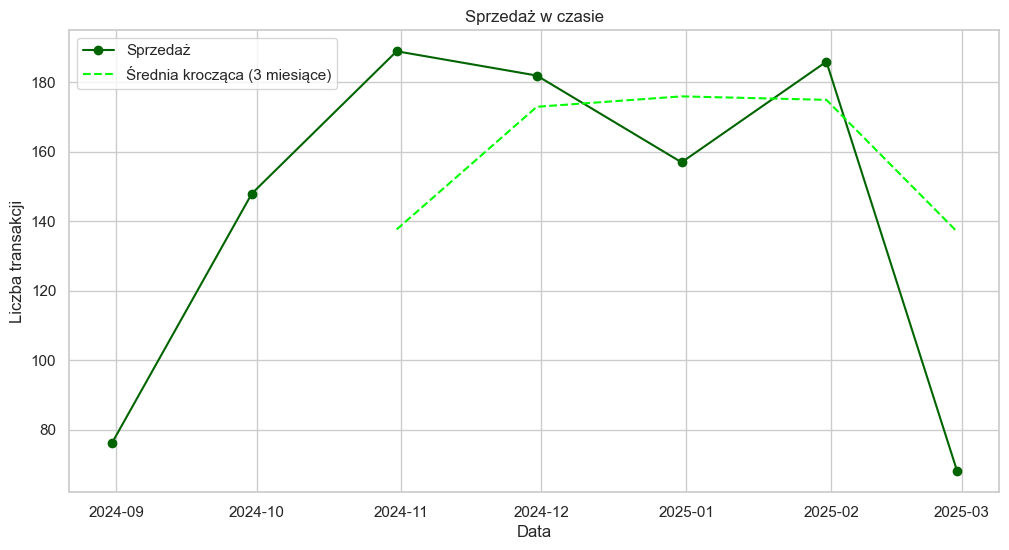

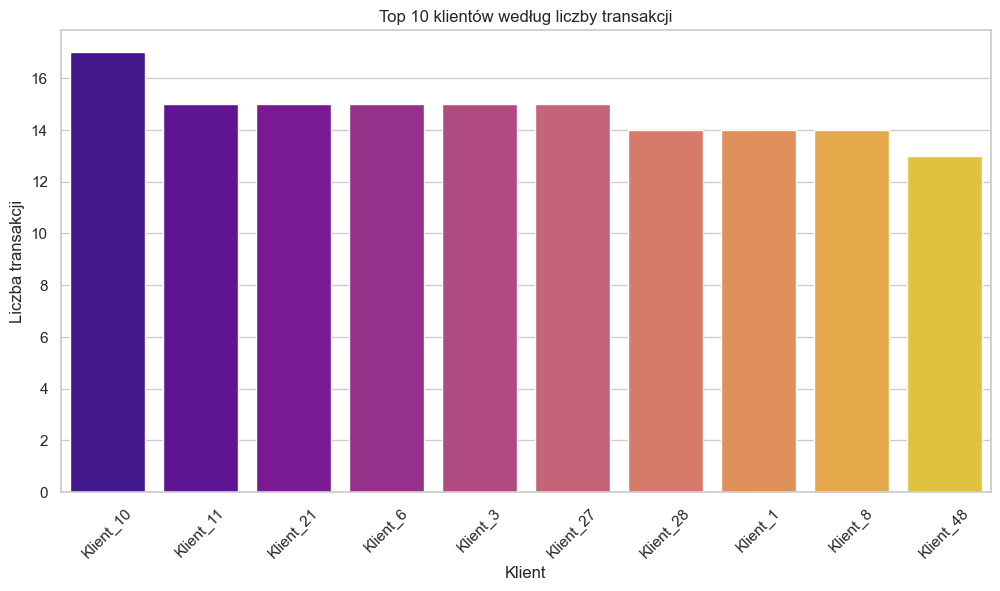

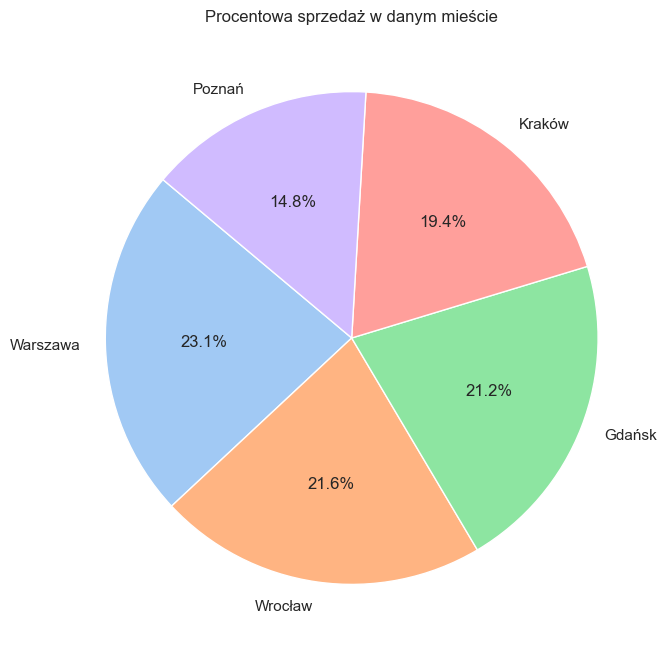

In [61]:

df = pd.read_excel('sales_data.xlsx')
df['Data'] = pd.to_datetime(df['Data'])

sns.set(style="whitegrid")

# 1. Wykres slupkowy dla 10 najbardziej popularnych produktów
plt.figure(figsize=(10, 6))
product_counts = df['Produkt'].value_counts().head(10)  
sns.barplot(x=product_counts.index, y=product_counts.values, hue=product_counts.index, palette="viridis", legend=False)
plt.title('10 najlepiej sprzedających produktów')
plt.xlabel('Nazwa produktu')
plt.ylabel('Liczba transakcji')
plt.xticks(rotation=45)
plt.show()

# 2. Wykres liniowy dla sprzedaży w czasie, z uwzględnieniem średniej kroczącej
sales = df.set_index('Data').resample('ME').size()
rolling_avg = sales.rolling(window=3).mean()
plt.figure(figsize=(12, 6))
plt.plot(sales.index, sales, label='Sprzedaż', marker='o', color='darkgreen')
plt.plot(rolling_avg.index, rolling_avg, label='Średnia krocząca (3 miesiące)', color='lime', linestyle='--')
plt.title('Sprzedaż w czasie')
plt.xlabel('Data')
plt.ylabel('Liczba transakcji')
plt.legend()
plt.show()

# 3. Wykres slupkowy dla top 10 klientow
plt.figure(figsize=(12, 6))
transakcje_klient = df.groupby('Klient')['TransakcjaID'].nunique().reset_index()
transakcje_klient.columns = ['Klient', 'LiczbaTransakcji']
transakcje_klient = transakcje_klient.sort_values(by='LiczbaTransakcji', ascending=False).head(10) 

sns.barplot(x='Klient', y='LiczbaTransakcji', data=transakcje_klient, hue='Klient', palette="plasma", legend=False)
plt.title('Top 10 klientów według liczby transakcji')
plt.xlabel('Klient')
plt.ylabel('Liczba transakcji')
plt.xticks(rotation=45)
plt.show()

# 4. Wykres kolisty dla sprzedaży w rozroznieniu na miasta
plt.figure(figsize=(8, 8))
location_counts = df['Lokalizacja'].value_counts()
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Procentowa sprzedaż w danym mieście')
plt.show()